In [1]:
from detect.fall_detection.detect import run_yolo
from models.common import DetectMultiBackend
import torch
import cv2

/Users/maochenhui/miniforge3/envs/DL/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
weights = "./runs/train/yolov5n/weights/best.pt"
source = "./data/dataset/Fall_Detection_Object/Test/Fall_Person_valid_000002.png"
data = "./data/custom.yaml"

img = cv2.imread(source)
img = cv2.resize(img, (416, 416))

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = DetectMultiBackend(weights, device=device, data=data)
run_yolo(model, img, device)

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients, 4.2 GFLOPs


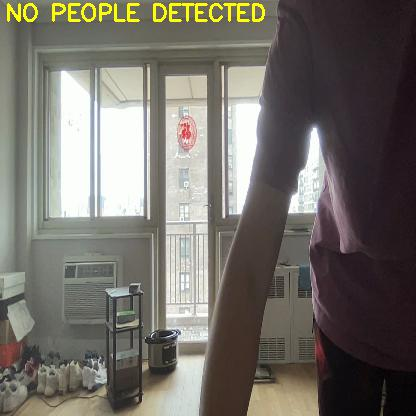

Detect Finished


In [4]:
from detect.fall_detection.detect import live_inference
from models.cnn3d import get_model, resnet10

yolo_model = model
# cnn3d = get_model(sample_size=112, sample_duration=10, num_classes=2)
# cnn3d.load_state_dict(torch.load("./runs/cnn3d/basemodel/best.pt", map_location=device))
cnn3d = resnet10(sample_size=112, sample_duration=10, num_classes=2)
cnn3d.load_state_dict(torch.load("./runs/cnn3d/resnet/best.pt", map_location=device))
# source = 0
source = "./runs/detect/exp/FALL_DEMO2.mp4"

live_inference(yolo_model=yolo_model,
               cnn3d=cnn3d, 
               source=source,
               out_name="FALL_DETECTION",
               duration=5,
               fall=True,
               conf_thres=0.4)